# Mercedes-Benz Greener Manufacturing

## 1.Business Problem:-

### 1.1 Introduction

- Diamer’s Mercedes Benz is a leading premium car manufacturing industry. This company applies for nearly 2000 patents a year making European leader among premium cars . With a huge selection of features and options customers can choose the customized car of their dreams. To ensure safety of each car configuration before they are launched on to the roads they have to undergo a testing phase. As there are many features and combinations,Daimer wants to find the best algorithm to calculate the testing time without reducing its standards.


### 1.2 Problem Statement

- Given the car configuration and the tests it has gone through, predict the time taken to complete the testing phase

### 1.3 Business Constraints

- No Latency Constraints
- Some level of Interpretability

## 2.Machine Learning Problem

In [1]:
##Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import phik
warnings.filterwarnings('ignore')

### Data

Source:-https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/overview

- Data is having two csv files
    - train.csv
    - test.csv

#### Performance Metric:
Source:-https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/overview/evaluation
        
As we are predicting the time taken for testing each car configuration , it is a regression task and the evaluation metric is R^2(Coefficient of determination).


#### References:-
- https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
- https://www.youtube.com/watch?v=Bao9GGZMLhU
- https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/34530
- https://www.kaggle.com/hakeem/stacked-then-averaged-models-0-5697


#### Reading train.csv

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Top 5 rows of the data frames

Train data:-

In [3]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


Test data:-

In [4]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


#### Shapes of the dataframe

Shape of train data:-

In [5]:
print('Shape of train data : {0} rows {1} columns'.format(train.shape[0],train.shape[1]))

Shape of train data : 4209 rows 378 columns


Shape of test data:-

In [6]:
print('Shape of test data : {0} rows {1} columns'.format(test.shape[0],test.shape[1]))

Shape of test data : 4209 rows 377 columns


#### Info of the data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


##### There are three types of datatypes in columns :-
- Float64             => Column 'y'
- Int64               => Columns 'ID' and 'X10' to 'X385
- Object(categorical) =>Columns 'X0' to 'X8'

##### Columns description :-
- Column Id is a unique ta given to each car configuration
- Column y is the dependent variable ie time taken for each configuration to pass the testing phase
- Columns X0 to X8 are Categorical
    - Column X0 is having 47 unique categories
    - Column X1 is having 27 unique categories
    - Column X2 is having 44 unique categories
    - Column X3 is having 7 unique categories
    - Column X4 is having 7 unique categories
    - Column X5 is having 29 unique categories
    - Column X6 is having 12 unique categories
    - Column X8 is having 25 unique categories
- Columns X10 to X385 are of Binary Data types having 1 and 0 as variable  
    
#### Test data is also having same columns except the time taken for testing phase.

#### Checking for any null values in train-data

In [8]:
print('Total null values in train data are :',train.isnull().sum().sum())

Total null values in train data are : 0


In [9]:
print('Total null values in test data are :',test.isnull().sum().sum())

Total null values in test data are : 0


There are no null values in both the dataframes

### Target variable analysis

#### Distribution plot of Target variable

Text(0, 0.5, 'Distribution')

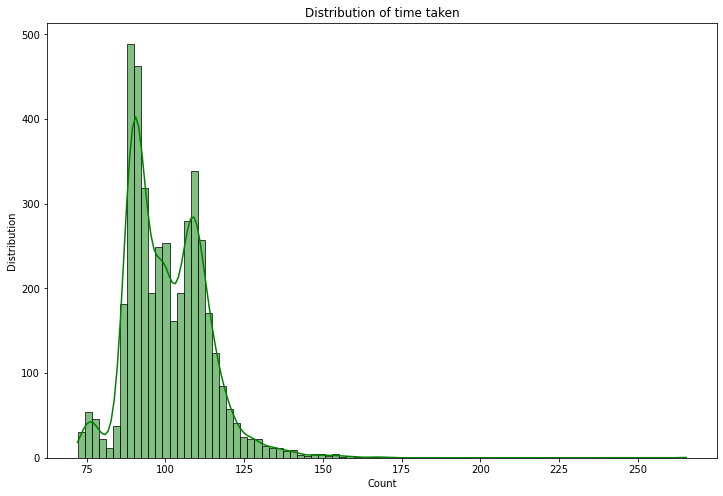

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(train['y'],kde=True,color='green')
plt.title('Distribution of time taken')
plt.xlabel('Count')
plt.ylabel('Distribution')

From the distribution plot we can see that majority of the distribution is between 70 to 175 and there are some points beyond 250 we can get a clean view by using box plots

#### Box Plot of target variable

Text(0.5, 1.0, 'Box Plot of Target variable')

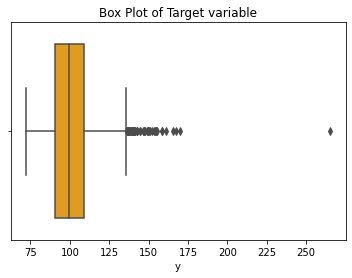

In [11]:
sns.boxplot(train['y'],color='orange')
plt.title('Box Plot of Target variable')

From box plot we can see that only some points are beyond 250 they may be outliers, checking percentiles will give much better understanding

#### Calculating percentiles of target variable

In [12]:
print("0th Percentile of target variable:",np.percentile(train['y'],0))
print("25th Percentile of target variable:",np.percentile(train['y'],25))
print("50th Percentile of target variable:",np.percentile(train['y'],50))
print("75th Percentile of target variable:",np.percentile(train['y'],75))
print("100th Percentile of target variable:",np.percentile(train['y'],100))

0th Percentile of target variable: 72.11
25th Percentile of target variable: 90.82
50th Percentile of target variable: 99.15
75th Percentile of target variable: 109.01
100th Percentile of target variable: 265.32


Range of target variable lies between 72 and 265 but there is a clear spike so check for 90 to 100 percentiles

##### 90 to 100 Percentile of target variable

In [13]:
for i in range(11):
    print(str(90+i)+"th Percentile of target variable:",np.percentile(train['y'],90+i))

90th Percentile of target variable: 115.25
91th Percentile of target variable: 116.0484
92th Percentile of target variable: 116.89160000000001
93th Percentile of target variable: 118.0376
94th Percentile of target variable: 119.056
95th Percentile of target variable: 120.80600000000001
96th Percentile of target variable: 122.4
97th Percentile of target variable: 125.89319999999998
98th Percentile of target variable: 129.2992
99th Percentile of target variable: 137.4304
100th Percentile of target variable: 265.32


After 99 percentile there is a spike in the values so checking for 99 to 100 percentiles to get more clear understanding

##### 99 to 100 percentile of Target variable

In [14]:
for i in range(11):
    print(str(99+(i*0.1))+"th Percentile of target variable:",np.percentile(train['y'],99+(i*0.1)))

99.0th Percentile of target variable: 137.4304
99.1th Percentile of target variable: 139.09024
99.2th Percentile of target variable: 140.1836
99.3th Percentile of target variable: 140.81639999999993
99.4th Percentile of target variable: 142.6480000000001
99.5th Percentile of target variable: 146.23040000000006
99.6th Percentile of target variable: 149.0374399999998
99.7th Percentile of target variable: 151.4276800000003
99.8th Percentile of target variable: 154.68695999999994
99.9th Percentile of target variable: 160.38328000000087
100.0th Percentile of target variable: 265.32


Even here there is a huge margin between 99.9 and 100 perccentile so checking between 99.9 to 100 percentiles

##### 99.90 to 100.00 percentile of Target variable

In [15]:
for i in range(11):
    print(str(99.9+(i*0.01))+"th Percentile of target variable:",np.percentile(train['y'],99.9+(i*0.01)))

99.9th Percentile of target variable: 160.38328000000087
99.91000000000001th Percentile of target variable: 161.85952000000114
99.92th Percentile of target variable: 163.81624000000053
99.93th Percentile of target variable: 165.62499199999996
99.94000000000001th Percentile of target variable: 166.43713599999973
99.95th Percentile of target variable: 167.24928000000122
99.96000000000001th Percentile of target variable: 168.22932800000126
99.97th Percentile of target variable: 169.26449600000092
99.98th Percentile of target variable: 185.02294400002444
99.99000000000001th Percentile of target variable: 225.17147200001222
100.0th Percentile of target variable: 265.32


From the percentiles we can see that around 0.01% of data ie approx 42 points lie between 225 to 265 . we can try training the model by considering them as outliers and verify

### Univariate Analysis

There are 8 Categorical variable X0,X1,X2,X3,X4,X5,X6 and X8

In [16]:
##ref https://matplotlib.org/3.3.2/gallery/subplots_axes_and_figures/axes_margins.html#sphx-glr-gallery-subplots-axes-and-figures-axes-margins-py
## Plotting function
def dist_plot(x):
    #Unique categories in column
    print('Number of unique categories in column '+str(x)+' are:',train[x].nunique()) 
    plt.figure(figsize=(20,10))
    ##Subplot1: Distribution of categories
    plt.subplot(221)
    plt.bar(train[x].unique(),train[x].value_counts(),color='orange')
    plt.title('Distribution of '+x)
    ##Subplot2 : Pie chart of categories
    plt.subplot(222)
    plt.pie(train[x].value_counts(),labels=train[x].unique(),autopct="%1.1f%%")
    plt.title('Pie plot of '+x)
    ##Subplot3 : Box plot with respect to target variable for each category
    plt.subplot(212); 
    sns.boxplot(train[x],train['y'])
    plt.title('Distribution of y with respect to '+x)
    plt.show()

#### Column:X0

Number of unique categories in column X0 are: 47


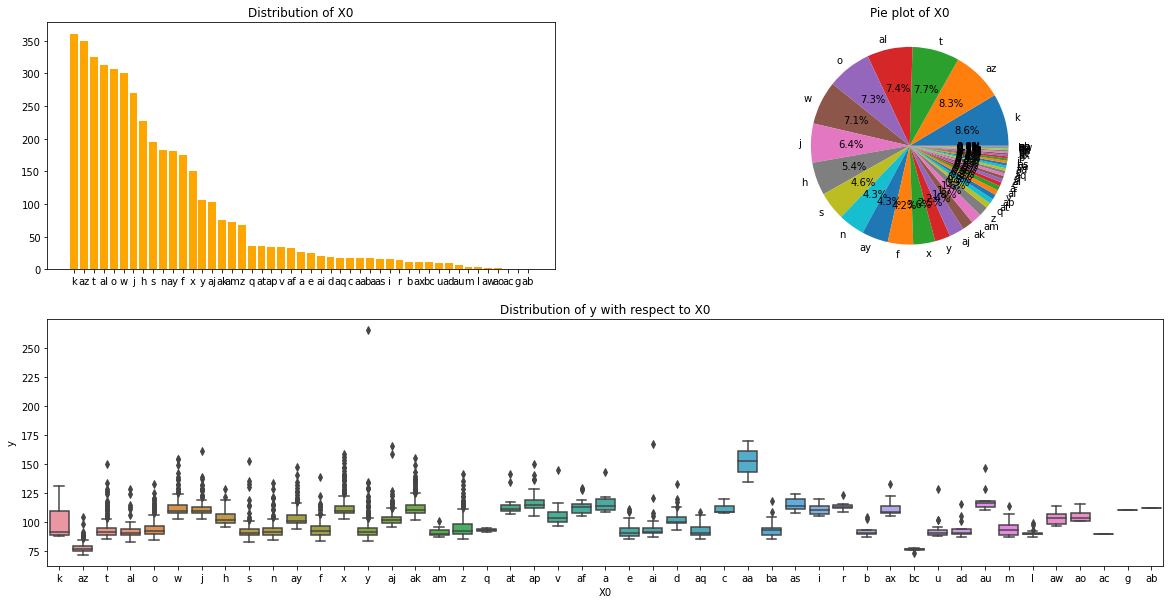

In [17]:
dist_plot('X0')

- There are 47 unique categories in X0
- Distribution of X0 falls sharply.
- from the Box plot each category is having some different ranges so X0 may help in predicting the target variable
- Category aa has more average mean than all other categories

#### Column : X1

Number of unique categories in column X1 are: 27


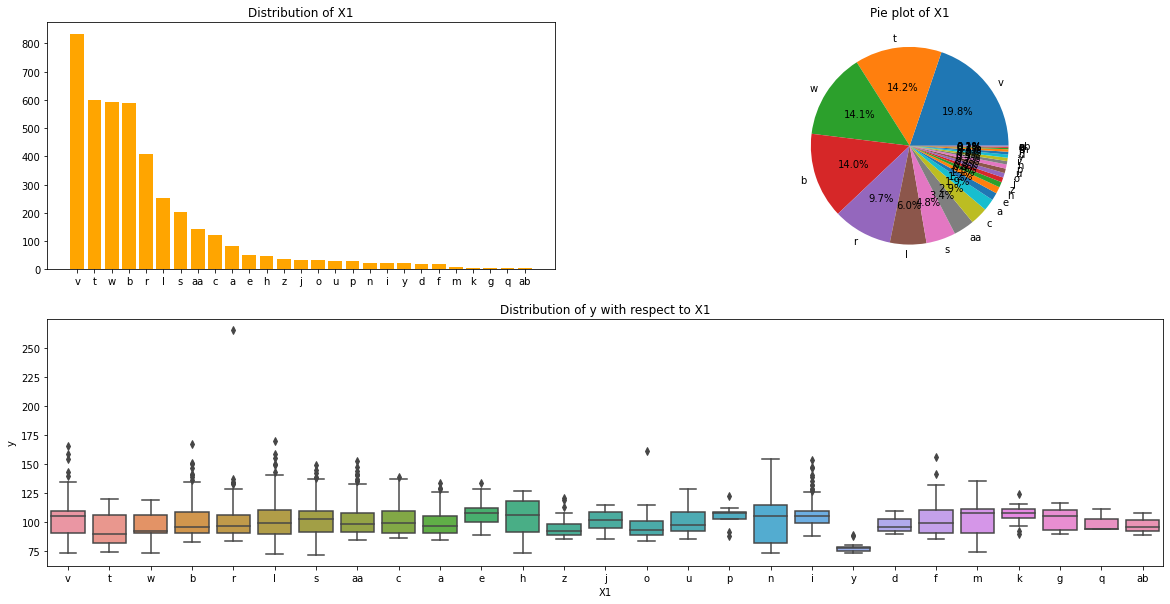

In [18]:
dist_plot('X1')

- There are 27 unique categories in X1
- Distribution of X1 falls sharply only a few have more than 200 variables
- In box plot many of the categories are overlapping, so it may not much help in predictiing target variable

#### Column: X2

Number of unique categories in column X2 are: 44


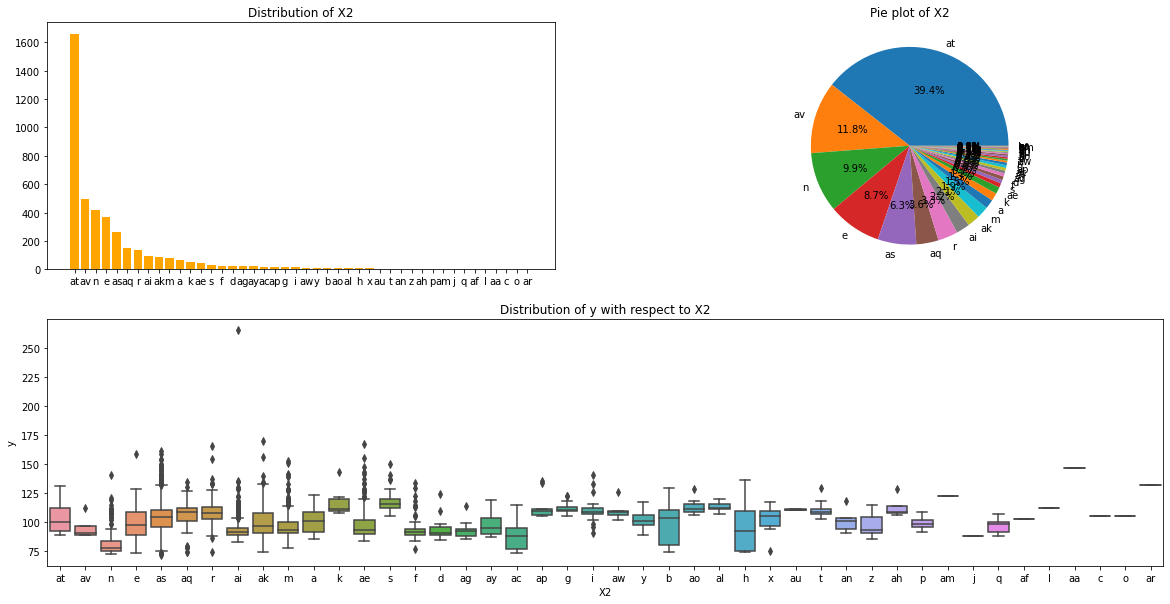

In [19]:
dist_plot('X2')

- There are 44 uique categories in X2
- Distribution falls very sharply 
- category 'at' contributes nealy 40% of the values
- From box plot each category has some different y values, So it may effect in predicting the target variable

#### Column: X3

Number of unique categories in column X3 are: 7


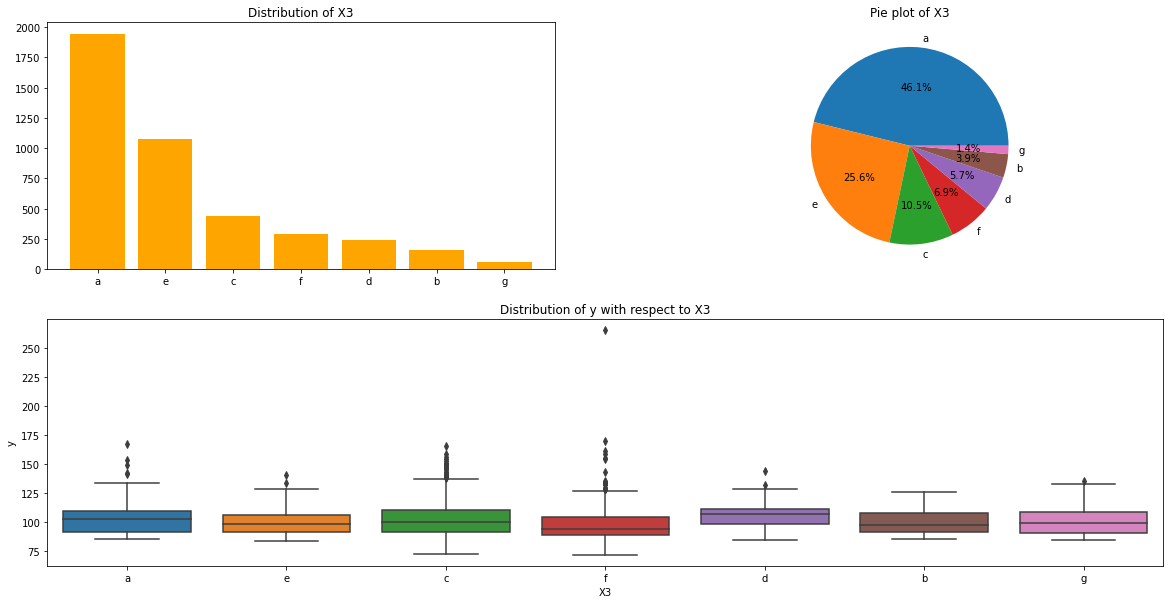

In [20]:
dist_plot('X3')

- There are seven unique categories in column X3
- Only categories 'a' and 'c' contribute more than 70 % of the values
- From box plot almost all the categories are having similar effect in predicting y values 

#### Column X4

Number of unique categories in column X4 are: 4


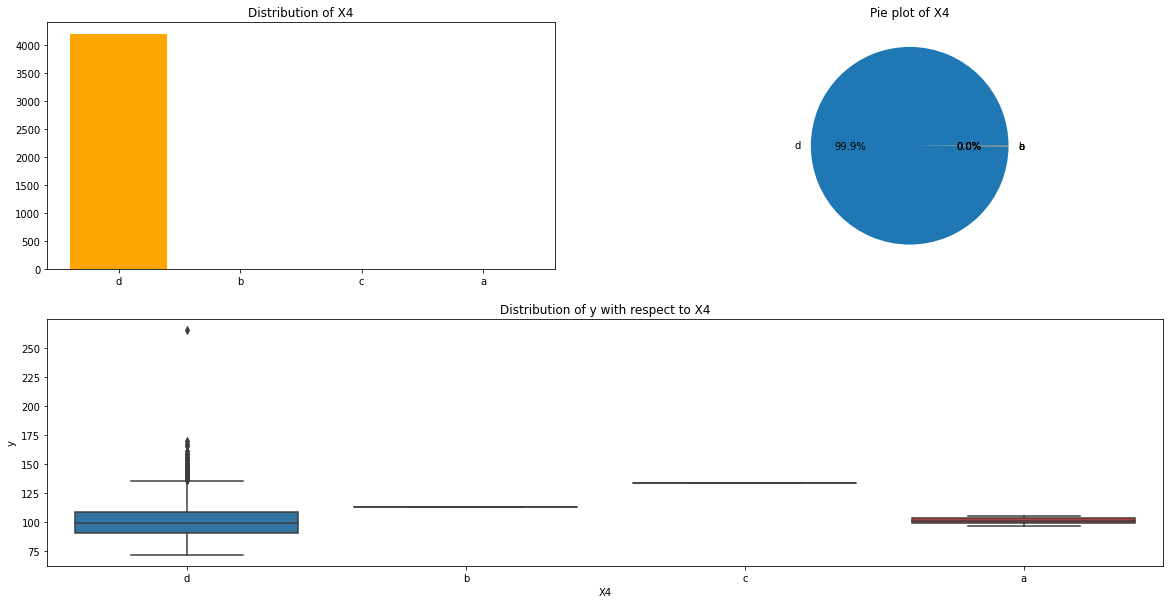

In [21]:
dist_plot('X4')

- There are 4 unique categories in column X4
- only category 'a' is having more than 99.9% of values
- This feature may not effect in predicting the target variable

#### Column: X5

Number of unique categories in column X5 are: 29


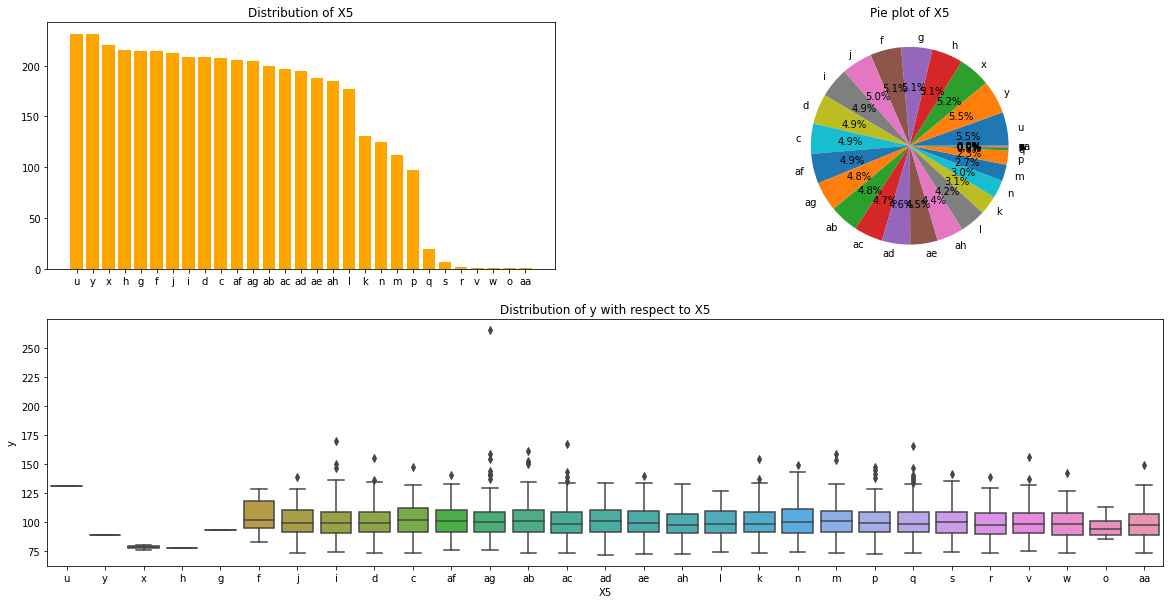

In [22]:
dist_plot('X5')

- There are 27 unique categories in column X5
- Distribution is almost uniform for more than half of the categories and then it falls sharply
- Some categories have different y values, these features may have some effect in predicting the target variable

#### Column: X6

Number of unique categories in column X6 are: 12


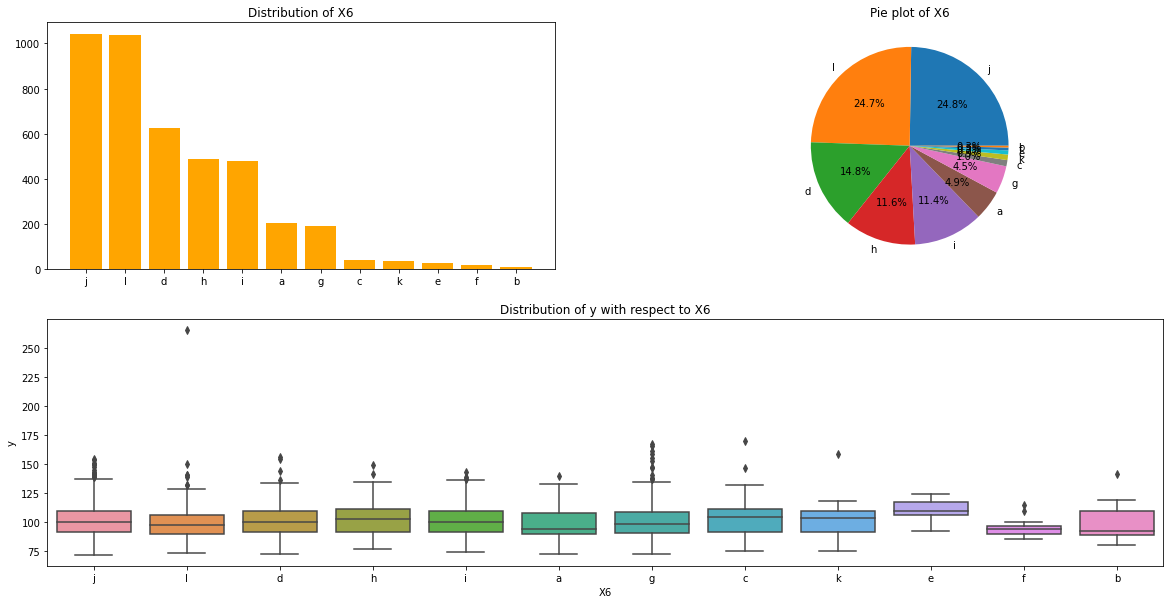

In [23]:
dist_plot('X6')

- There are 12 unique categories in column X6
- Only 6 categories contribute more than 75% of the values
- From box plot all the categories are having almost similar effect in predicting the target variable

#### Column: X8

Number of unique categories in column X8 are: 25


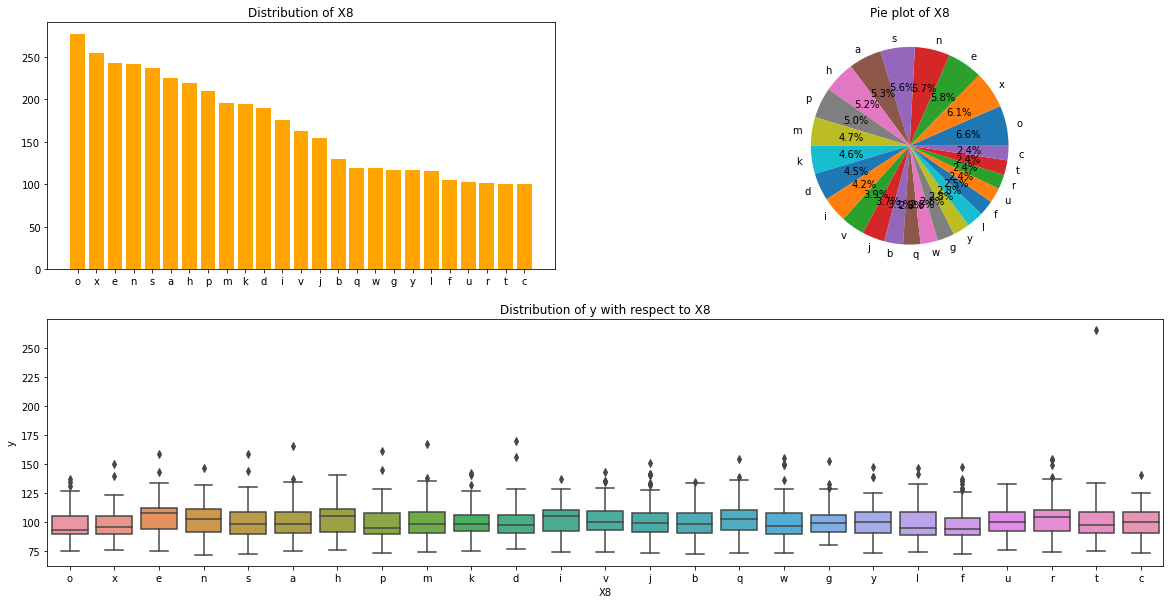

In [24]:
dist_plot('X8')

- There are 25 unique categories in column X8
- Distribution is slowly falling and each category has more than 100 values 
- From box plot all categories have similar effect on predicting the target variable

#### Conclusion:
- Features X0,X1and X2 may have effect on prediciting the target varible comparing to other features
- Feature X4 is having ver little variance so we can training the model without X4
- Features X3,X4,X5,X8 are having almost similar mean y values among their categories.
- It is better to use target encoding instead of one hot encoding as the categories in each feature are more

### Binary feature Analysis

- There are 368 Binary features in the train and test data 

In [11]:
binary_columns=[]
for i in train.columns:
    if train[i].dtype =='int64' and i !='ID':
        binary_columns.append(i)

In [12]:
len(binary_columns)

368

#### Creating binary dataframes

In [13]:
binary_train = train[binary_columns]
binary_test = test[binary_columns]
binary_train = pd.concat((train['y'],binary_train),axis=1)


In [14]:
binary_train.head()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
binary_test.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
##ref:https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-mercedes
zero_sum=[]
one_sum=[]
for i in binary_columns:
    zero_sum.append((binary_train[i]==0).sum())
    one_sum.append((binary_train[i]==1).sum())

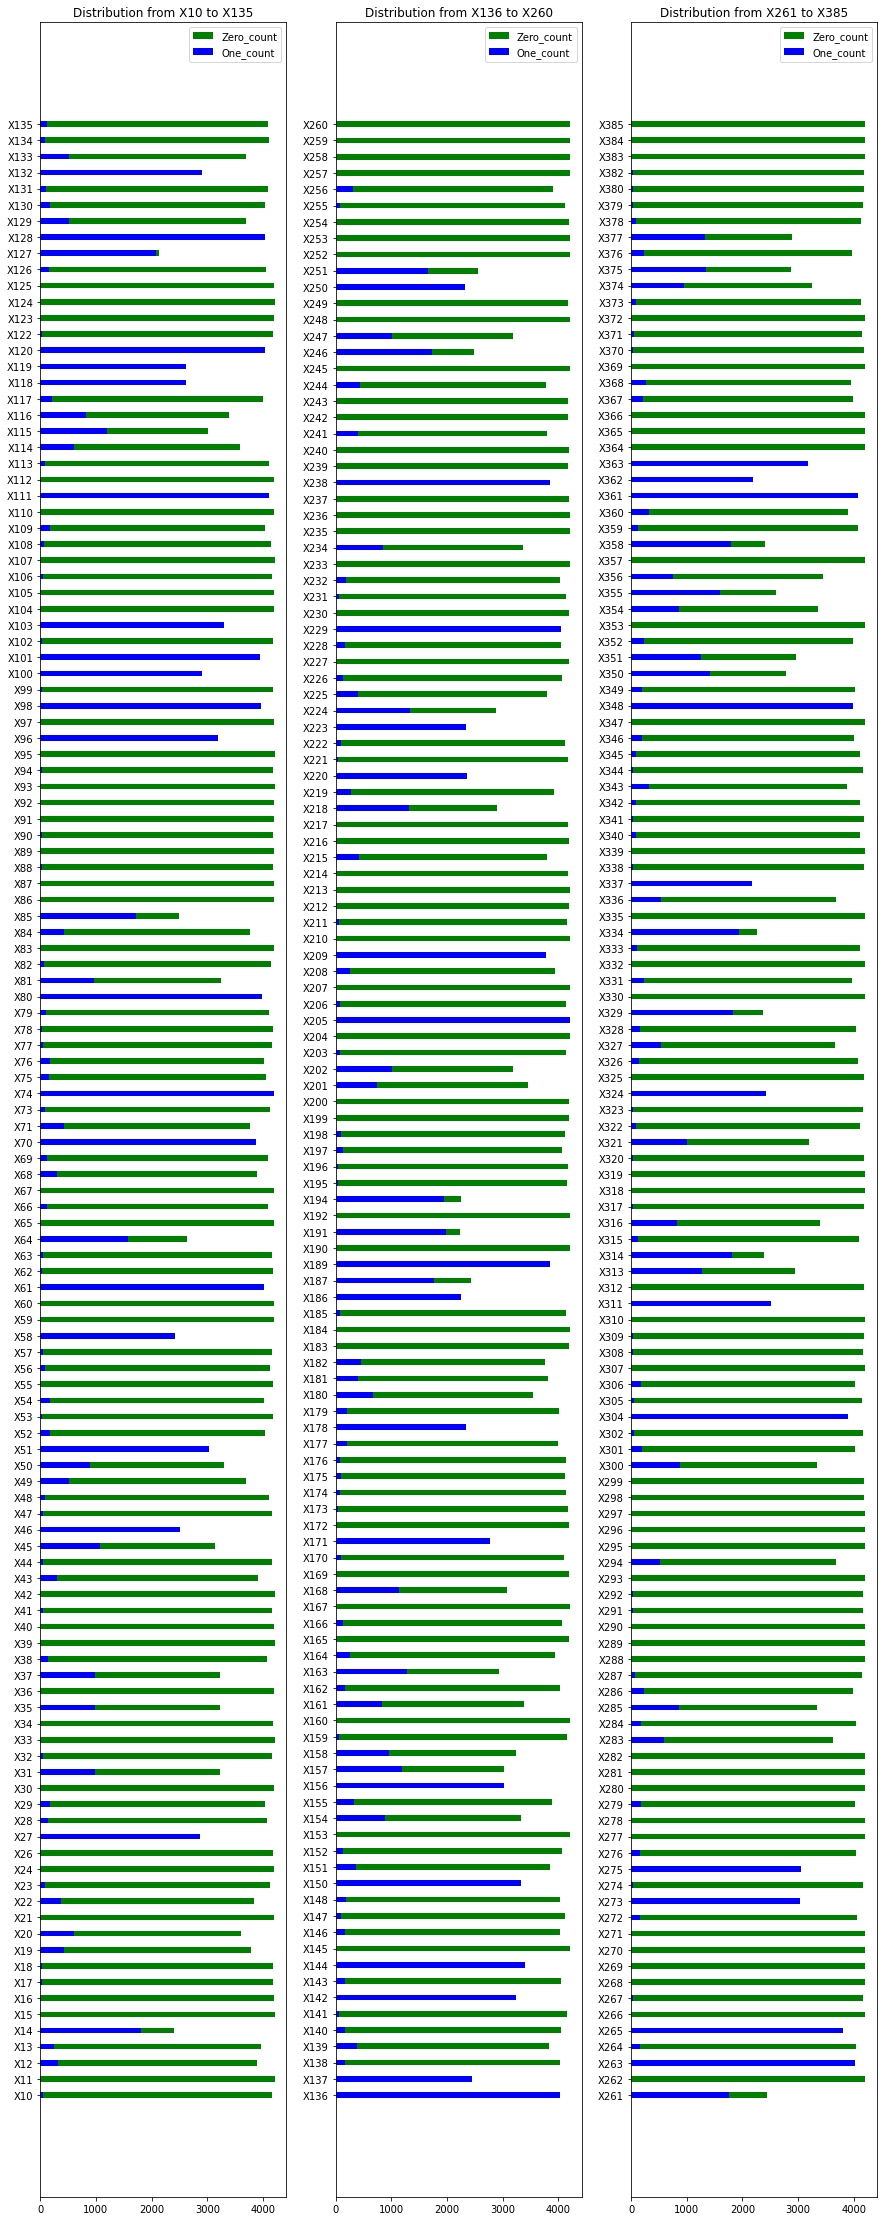

In [18]:

ind = np.arange(len(zero_sum))
plt.figure(figsize=(15,40))
# plt.suptitle("Counts of zeros and ones in each binary feature")
plt.subplot(1,3,1)
p1 =plt.barh(ind[0:123],zero_sum[0:123],0.35,color='green')
p2 =plt.barh(ind[0:123],one_sum[0:123],0.35,color='blue')
plt.yticks(ind[0:123],binary_columns[0:123])
plt.title('Distribution from X10 to X135')
plt.legend((p1[0],p2[0]),("Zero_count","One_count"))
plt.subplot(1,3,2)
p1=plt.barh(ind[123:245],zero_sum[123:245],0.35,color='green')
p2=plt.barh(ind[123:245],one_sum[123:245],0.35,color='blue')
plt.yticks(ind[123:245],binary_columns[123:245])
plt.title('Distribution from X136 to X260')
plt.legend((p1[0],p2[0]),("Zero_count","One_count"))
plt.subplot(1,3,3)
p1=plt.barh(ind[245:368],zero_sum[245:368],0.35,color='green')
p2=plt.barh(ind[245:368],one_sum[245:368],0.35,color='blue')
plt.yticks(ind[245:368],binary_columns[245:368])
plt.title('Distribution from X261 to X385')
plt.legend((p1[0],p2[0]),("Zero_count","One_count"))
plt.savefig('New folder/binary.png')

#### Counts of zeros and ones in each binary feature

##### Summary:
- Above plot is for number of zeros and ones in each binary column
- Some columns are having zero variance ie either one's or zero's
- we can try removing those columns and train the data
- Many columns are having variance in the binary variable may be they are used in predicting the target variable

### Encoding categorical variables using target encoder

In [32]:
from category_encoders import TargetEncoder

In [33]:
##Storing categorical features 
cat_columns=[]
for i in train.columns:
    if train[i].dtype =='O' or train[i].dtype =='float64':
        cat_columns.append(i)

In [34]:
##Categorical train data
cat_train = train[cat_columns]
##Categorical test data
cat_columns.remove('y')
cat_test = test[cat_columns]

Shape of Categorical data

In [35]:
cat_train.shape,cat_test.shape

((4209, 9), (4209, 8))

Target encoding each feature with respect to Target variable

In [36]:
for i in cat_columns:
    en = TargetEncoder()
    en.fit(train[i],train['y'])
    cat_train[i] = en.transform(train[i])
    cat_test[i] = en.transform(test[i])

In [37]:
cat_train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8
0,130.81,99.491872,101.412574,104.194580,102.507477,100.658293,100.669318,101.165245,97.746933
1,88.53,99.491872,93.723226,95.754685,100.033190,100.658293,100.669318,98.945502,97.746933
2,76.26,78.025543,95.764808,83.369927,101.959269,100.658293,84.418384,101.165245,98.577238
3,80.62,78.025543,93.723226,83.369927,96.564507,100.658293,84.418384,98.945502,104.976311
4,78.02,78.025543,101.412574,83.369927,96.564507,100.658293,100.669318,101.346464,102.194215


In [38]:
cat_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,78.025543,101.412574,83.369927,96.564507,100.658293,100.669318,97.802524,99.134439
1,93.724575,99.837365,94.136482,102.507477,100.658293,100.669318,100.306286,101.435086
2,78.025543,101.412574,103.732453,96.564507,100.658293,100.669318,101.165245,100.455162
3,78.025543,100.725237,83.369927,96.564507,100.658293,100.669318,98.945502,102.194215
4,112.614121,101.868462,103.732453,101.959269,100.658293,100.669318,101.226803,100.486194


Column X4 is having very little variance so dropping  X4

In [39]:
cat_train.drop('X4',axis=1,inplace=True)
cat_test.drop('X4',axis=1,inplace=True)

In [40]:
cat_train.head()

,y,X0,X1,X2,X3,X5,X6,X8
0,130.81,99.491872,101.412574,104.194580,102.507477,100.669318,101.165245,97.746933
1,88.53,99.491872,93.723226,95.754685,100.033190,100.669318,98.945502,97.746933
2,76.26,78.025543,95.764808,83.369927,101.959269,84.418384,101.165245,98.577238
3,80.62,78.025543,93.723226,83.369927,96.564507,84.418384,98.945502,104.976311
4,78.02,78.025543,101.412574,83.369927,96.564507,100.669318,101.346464,102.194215


Concatinating Encoded features with the binary data

In [41]:
enc_train = pd.concat((cat_train,binary_train),axis=1)
enc_test = pd.concat((cat_test,binary_test),axis=1)

In [42]:
enc_train.head()

,y,X0,X1,X2,X3,X5,X6,X8,y,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,99.491872,101.412574,104.194580,102.507477,100.669318,101.165245,97.746933,130.81,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,99.491872,93.723226,95.754685,100.033190,100.669318,98.945502,97.746933,88.53,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,78.025543,95.764808,83.369927,101.959269,84.418384,101.165245,98.577238,76.26,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,78.025543,93.723226,83.369927,96.564507,84.418384,98.945502,104.976311,80.62,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,78.025543,101.412574,83.369927,96.564507,100.669318,101.346464,102.194215,78.02,0,...,0,0,0,0,0,0,0,0,0,0


This is the data frame with target encoded features and binary features

### Features using PCA and TSVD

In [43]:
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.preprocessing import LabelEncoder

Label encoding the Categorical features using Labelencoder

In [44]:
train_df=pd.DataFrame()
test_df = pd.DataFrame()
for i in cat_columns:
    en =LabelEncoder()
    en.fit(list(train[i].values)+list(test[i].values))
    train_df[i] = en.transform(train[i])
    test_df[i] = en.transform(test[i])

Concatinating Encoded features with binary data

In [45]:
train_df = pd.concat((train_df,binary_train),axis=1)
test_df = pd.concat((test_df,binary_test),axis=1)

In [46]:
train_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,y,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,37,23,20,0,3,27,9,14,130.81,0,...,0,0,1,0,0,0,0,0,0,0
1,37,21,22,4,3,31,11,14,88.53,0,...,1,0,0,0,0,0,0,0,0,0
2,24,24,38,2,3,30,9,23,76.26,0,...,0,0,0,0,0,0,1,0,0,0
3,24,21,38,5,3,30,11,4,80.62,0,...,0,0,0,0,0,0,0,0,0,0
4,24,23,38,5,3,14,3,13,78.02,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
test_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,24,23,38,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,46,3,9,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,24,23,19,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,24,13,38,5,3,32,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,49,20,19,2,3,31,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [48]:
#ref:https://www.kaggle.com/frednavruzov/baselines-to-start-with-lb-0-56
n=12
##Using PCA
pca = PCA(n_components=12)
pca_train = pca.fit_transform(train_df.drop(['y'],axis=1))
pca_test = pca.fit_transform(test_df)

In [49]:
##Using TruncatedSVD 
svd = TruncatedSVD(n_components=12)
svd_train = svd.fit_transform(train_df.drop(['y'],axis=1))
svd_test = svd.fit_transform(test_df)

In [50]:
new_train_feat = pd.DataFrame()
new_test_feat = pd.DataFrame()

for i in range(n):
    new_train_feat['pca_'+str(i)] = pca_train[:,i]
    new_test_feat['pca_'+str(i)] = pca_test[:,i]
    
    new_train_feat['svd_'+str(i)] = svd_train[:,i]
    new_test_feat['svd_'+str(i)] = svd_test[:,i]

In [51]:
new_train_feat.head()

,pca_0,svd_0,pca_1,svd_1,pca_2,svd_2,pca_3,svd_3,pca_4,svd_4,...,pca_7,svd_7,pca_8,svd_8,pca_9,svd_9,pca_10,svd_10,pca_11,svd_11
0,-0.207636,55.330757,0.024443,5.767961,14.864508,-13.682584,8.131696,0.892273,1.414920,-3.427856,...,1.536077,2.548903,-0.651233,-0.410512,1.731848,1.754168,0.321441,0.161142,0.348559,-0.394730
1,-0.244088,57.748185,1.731675,7.317767,18.211080,-14.589072,5.240202,-3.155797,1.580505,-3.139241,...,0.819099,2.685205,-0.795472,-0.294630,-0.150151,1.025503,0.765949,-0.819777,-0.357180,0.217431
2,16.273151,56.668913,13.784527,27.694836,17.926991,-10.705787,5.598200,-2.085824,11.768185,5.796167,...,1.589020,3.174251,-0.615188,-0.084867,-0.425342,1.034721,-1.116782,0.742971,3.901366,2.697309
3,16.224685,51.870592,14.794585,25.638783,16.449822,-5.224037,1.644791,-7.416014,-6.948368,-10.490657,...,2.111656,3.899308,0.032763,0.317102,-0.909014,0.135165,-1.455533,0.937805,3.713026,2.863406
4,16.552597,48.331504,14.557940,23.913409,2.099074,2.020647,8.883864,6.364500,2.012850,-1.390665,...,2.112958,2.308871,1.167530,0.811907,-0.944709,-1.162416,-1.652230,1.163615,3.703185,2.549912


- We can use this new features in training the data
- There are no specific names for the columns in the data so feature engineering is hard

#### Corelation Plot

In [19]:
correlation_mat = train.phik_matrix()

interval columns not set, guessing: ['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_mat,annot=True)

<AxesSubplot:>

Error in callback <function flush_figures at 0x0000015108A6BD38> (for post_execute):


KeyboardInterrupt: 

#### Corelation plot of categorical variables

<AxesSubplot:>

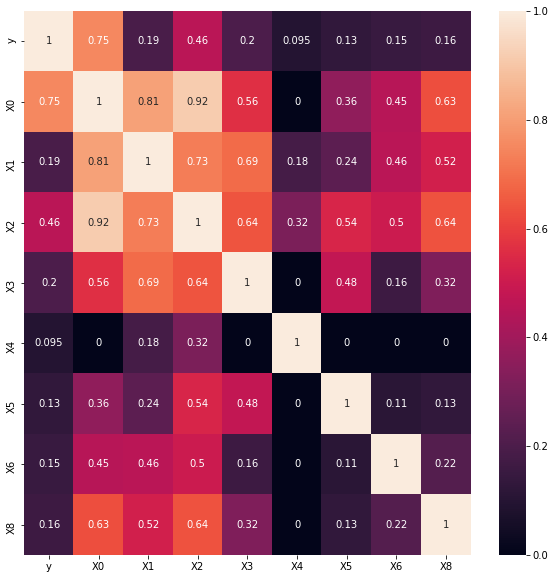

In [53]:
cat_cor = correlation_mat.iloc[1:10,1:10]
plt.figure(figsize=(10,10))
sns.heatmap(cat_cor,annot=True)

In [54]:
cat_corelation = cat_cor['y'].sort_values(ascending=False)

##### Corelation of Categorical features with respect to target variable

In [55]:
cat_corelation

y     1.000000
X0    0.751650
X2    0.458670
X3    0.200693
X1    0.193189
X8    0.163571
X6    0.151896
X5    0.129308
X4    0.094501
Name: y, dtype: float64

- From the corelation plot columns X0 and X2 are much corelated to the target variable than other variable
- Columns X4 is having very low corelation so we can try dropping that feature and train the model

#### Pair plot of the categorical features with target encoding

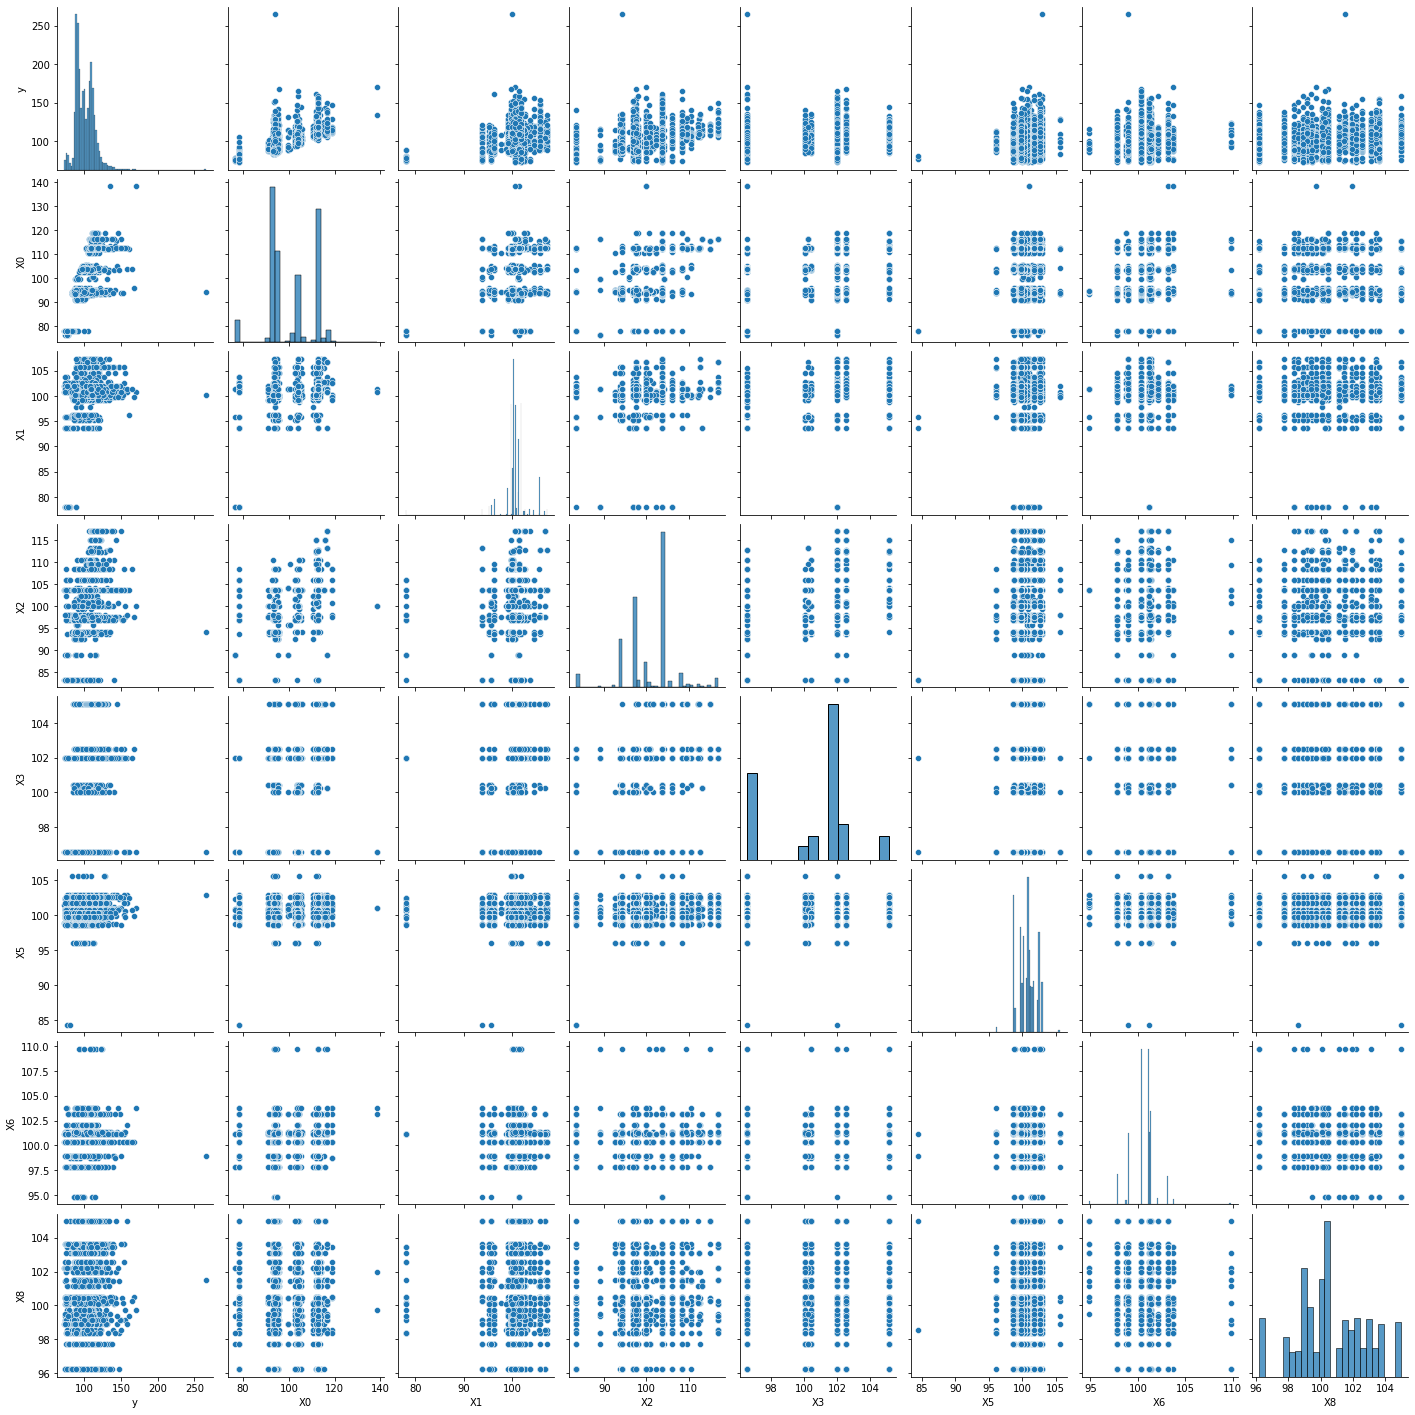

In [56]:
sns.pairplot(cat_train)

Pair plot doesn't give much information about the relation between the variables

In [57]:
top_150 = correlation_mat['y'].sort_values(ascending=False)

#### Top 10 corelated features with target varible

In [60]:
top_150[:10]

X339    1.000000
y       1.000000
X0      0.751650
X236    0.659690
X314    0.532702
X261    0.518549
X127    0.465000
X2      0.458670
X54     0.314066
X136    0.314066
Name: y, dtype: float64

<AxesSubplot:>

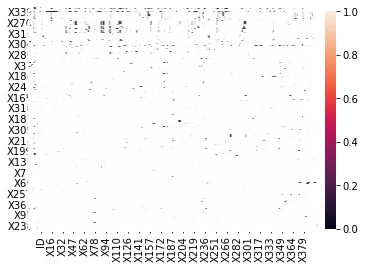

In [64]:
sns.heatmap(correlation_mat.loc[top_150.index])

- These are the top 10 corelated columns with the target variable
- Binary varible X339 is highly corelated with the target varible
- more than 75 columns are having no relation with the target variable
- We can try training the model without them and check the performance considering the feature selection as hyper parameter